# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline
from sklearn.metrics import silhouette_samples,silhouette_score

In [72]:
from sklearn import datasets

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])
X.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


## 1. Train a [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) clustering model on the data set using 8 clusters and compute the [silhouette score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for the model.

In [123]:
##Scale the data
from scipy.stats import zscore
mydata_z = X.apply(zscore)
mydata_z.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [124]:
km = KMeans(n_clusters=8, random_state=42)
# Fit the KMeans model
km.fit_predict(mydata_z)
# Calculate Silhoutte Score
score = silhouette_score(mydata_z, km.labels_, metric='euclidean')
# Print the score
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.182


## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [125]:
km = KMeans(n_clusters=5, random_state=42)
# Fit the KMeans model
km.fit_predict(mydata_z)
# Calculate Silhoutte Score
score = silhouette_score(mydata_z, km.labels_, metric='euclidean')
# Print the score
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.229


## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [126]:
km = KMeans(n_clusters=3, random_state=42)
# Fit the KMeans model
km.fit_predict(mydata_z)
# Calculate Silhoutte Score
score = silhouette_score(mydata_z, km.labels_, metric='euclidean')
# Print the score
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.285


### 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

In [129]:
# List to store cluster and intra cluster distance
clusters = []
inertia_vals = []
# Since creating one cluster is similar to observing the data as a whole, multiple values of K are utilized to come up with the optimum cluster value
#Note: Cluster number and intra cluster distance is appended for plotting the elbow curve
for k in range(1, 10, 1):
    
    # train clustering with the specified K
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(mydata_z)
# append model to cluster list
    clusters.append(model)
    inertia_vals.append(model.inertia_)

1. I = Inertial = Sum of the squared distance of data points to their closest cluster
2. n = Total number of records in the dataset
3. D()= Sum of squared distance
4. Xi = Record i in the data (i.e. in this case record of a given patient)
5. Ck = Cluster to which record Xi is assigned

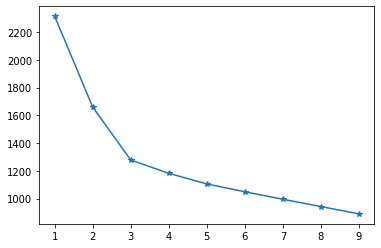

In [134]:
# plot the inertia vs K values
plt.plot(range(1,10,1),inertia_vals,marker='*')
plt.show()

In [136]:
from sklearn.metrics import silhouette_score
for i in range(1,10,1):
    
    print("---------------------------------------")
    print(clusters[i])
    print("Silhouette score:",silhouette_score(mydata_z, clusters[i].predict(mydata_z)))

---------------------------------------
KMeans(n_clusters=2, random_state=42)
Silhouette score: 0.26831340971052126
---------------------------------------
KMeans(n_clusters=3, random_state=42)
Silhouette score: 0.2848589191898987
---------------------------------------
KMeans(n_clusters=4, random_state=42)
Silhouette score: 0.24246272803111527
---------------------------------------
KMeans(n_clusters=5, random_state=42)
Silhouette score: 0.22854030629788522
---------------------------------------
KMeans(n_clusters=6, random_state=42)
Silhouette score: 0.16753060307159373
---------------------------------------
KMeans(n_clusters=7, random_state=42)
Silhouette score: 0.1821569030004699
---------------------------------------
KMeans(random_state=42)
Silhouette score: 0.1823813433228928
---------------------------------------
KMeans(n_clusters=9, random_state=42)
Silhouette score: 0.18079229786147186
---------------------------------------


IndexError: list index out of range

In [139]:
y_predict = km.fit_predict(X)
centroids = km.cluster_centers_

In [140]:
y_predict

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 2, 0,
       2, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2])

In [141]:
centroids

array([[1.29298387e+01, 2.50403226e+00, 2.40806452e+00, 1.98903226e+01,
        1.03596774e+02, 2.11112903e+00, 1.58403226e+00, 3.88387097e-01,
        1.50338710e+00, 5.65032258e+00, 8.83967742e-01, 2.36548387e+00,
        7.28338710e+02],
       [1.38044681e+01, 1.88340426e+00, 2.42617021e+00, 1.70234043e+01,
        1.05510638e+02, 2.86723404e+00, 3.01425532e+00, 2.85319149e-01,
        1.91042553e+00, 5.70255319e+00, 1.07829787e+00, 3.11404255e+00,
        1.19514894e+03],
       [1.25166667e+01, 2.49420290e+00, 2.28855072e+00, 2.08231884e+01,
        9.23478261e+01, 2.07072464e+00, 1.75840580e+00, 3.90144928e-01,
        1.45188406e+00, 4.08695651e+00, 9.41159420e-01, 2.49072464e+00,
        4.58231884e+02]])

In [142]:
silhouette_vals = silhouette_samples(X,y_predict)
avg_score = np.mean(silhouette_vals)
avg_score

0.5711381937868844

## 5. Try performing the same elbow tests with an [AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) model and compare the results you get to the KMeans results.

## 6. Create and plot a scatter matrix (pairplot) showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

## 7. Apply a [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) transform and plot the first two principle components with the plot point colors determined by cluster.

## 8. Generate a series of [t-SNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) plots showing the clusters at a variety of perplexities.